In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

View UMAP results for baseline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tfumap.paths import MODEL_DIR
from tfumap.semisupervised_keras import pretrained_networks

In [4]:
from tfumap.paths import FIGURE_DIR, save_fig

In [5]:
dataset = "cifar10"
datasets = [dataset]
aug_types = [
    "not_augmented",
    "umap_euclidean",
    "umap_learned",
    "augmented",
    "umap_augmented_learned",
    "umap_euclidean_augmented"
]
dset_sizes = [4, 16, 64, 256, 1024, "full"]

In [6]:
results_loc = MODEL_DIR / 'semisupervised-keras' 

In [7]:
results_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'augmented', 'timestamp', 'location', 'test_acc', 'dset_size_title'])
for dataset in datasets:

    for aug_type in aug_types:
        for dset_size in dset_sizes:
                
            dset_timestamp = pretrained_networks[dataset][aug_type][dset_size]
            dset_loc = results_loc / dataset/ str(dset_size) / dset_timestamp
            loc_list = list(dset_loc.glob('test_loss.npy'))
            if dset_size == 'full':
                if aug_type == 'augmented':
                    print(loc_list)
                    print(aug_type)
            if len(loc_list) == 0:
                print(aug_type, dset_size, dataset, dset_loc)
                continue
            test_loss, test_acc = np.load(loc_list[0])
            dset_size_title = str(dset_size)
            dset_size = str(dset_size) if dset_size is not 'full' else 4096
            results_df.loc[len(results_df)] = [
                dataset, dset_size, aug_type, dset_timestamp, dset_loc, test_acc, dset_size_title
            ]
results_df            

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/cifar10/full/cifar10_full____2020_08_11_19_25_33_543821_baseline_augmented/test_loss.npy')]
augmented


,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title
0,cifar10,4,not_augmented,cifar10_4____2020_08_17_16_02_48_330135_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.2170,4
1,cifar10,16,not_augmented,cifar10_16____2020_08_17_15_08_23_820108_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.3019,16
2,cifar10,64,not_augmented,cifar10_64____2020_08_17_15_08_38_407886_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.4992,64
3,cifar10,256,not_augmented,cifar10_256____2020_08_17_22_16_16_108071_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7220,256
4,cifar10,1024,not_augmented,cifar10_1024____2020_08_17_15_08_08_912644_bas...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8380,1024
5,cifar10,4096,not_augmented,cifar10_full____2020_08_17_15_08_15_778694_bas...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9049,full
6,cifar10,4,umap_euclidean,cifar10_0.0_4____2020_08_24_10_10_03_033874_um...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.1895,4
7,cifar10,16,umap_euclidean,cifar10_0.0_16____2020_08_24_00_26_41_868150_u...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.2867,16
8,cifar10,64,umap_euclidean,cifar10_0.0_64____2020_08_24_00_26_53_791994_u...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.4503,64
9,cifar10,256,umap_euclidean,cifar10_0.0_256____2020_08_24_00_22_53_202346_...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.6737,256


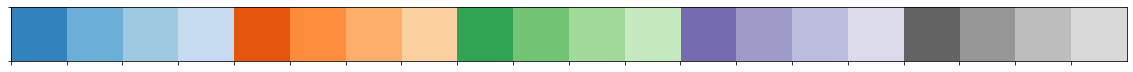

In [8]:
pal = sns.color_palette('tab20c',20)
sns.palplot(pal)

Text(0.5, 0, '# Training Examples')

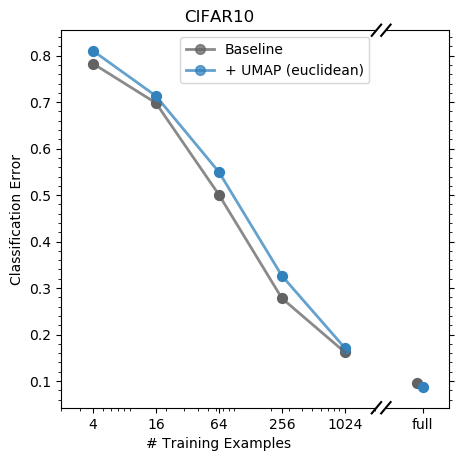

In [9]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_euclidean',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
ax.set_title('CIFAR10')
ax.set_ylabel('Classification Error')
ax.set_xlabel('# Training Examples')

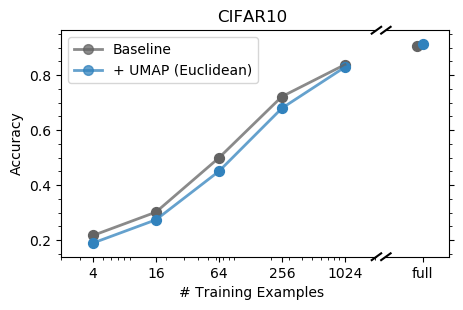

In [13]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_euclidean',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (Euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Accuracy')
ax.set_xlabel('# Training Examples', x=0.605)
#save_fig(FIGURE_DIR/(dataset + '_umap_euclidean'), save_pdf = True)

Text(0.605, 0, '# Training Examples')

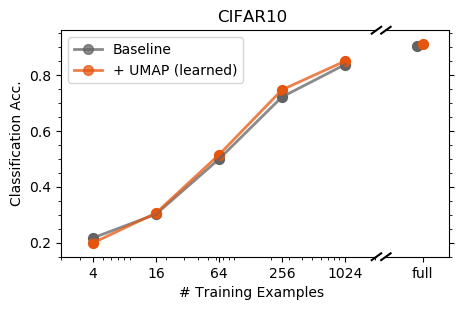

In [12]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_learned',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

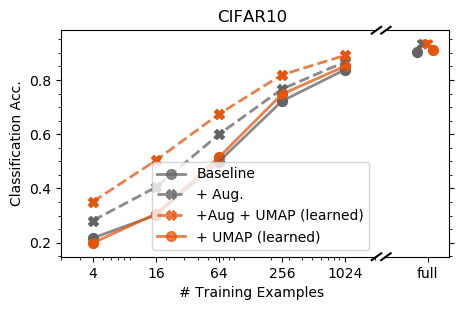

In [35]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_augmented_learned',
        "color": pal[4],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+Aug + UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_learned',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

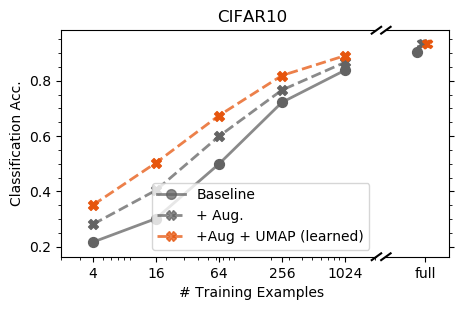

In [36]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_augmented_learned',
        "color": pal[4],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+Aug + UMAP (learned)"
    },
    #{
    #    "mask": results_df.augmented == 'umap_learned',
    #    "color": pal[4],
    #    "ls": 'solid',
    #    "marker": 'o',
    #    "label": "+ UMAP (learned)"
    #},

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

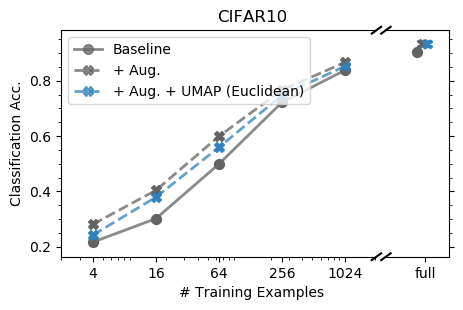

In [10]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    #{
    #    "mask": results_df.augmented == 'umap_euclidean',
    #    "color": pal[0],
    #    "ls": 'solid',
    #    "marker": 'o',
    #    "label": "+ UMAP (Euclidean)"
    #},
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (Euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)